In [68]:
from google.colab import files
uploaded = files.upload()

Saving cleanedtorontodata.csv to cleanedtorontodata (3).csv


In [0]:
#library imports
import numpy as np
import pandas as pd
import seaborn as sns
import keras
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
import scipy.stats as stats
import descartes
from keras.models import Sequential
from scipy.stats import chisquare, chi2_contingency, chi2
from sklearn import preprocessing
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Dropout, Activation
#from mpl_toolkits.basemap import Basemap
from keras.optimizers import SGD
#from hyperas import optim
#from hyperas.distributions import choice, uniform
import io
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
import scipy.stats as stats
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from keras import regularizers
from folium.plugins import MarkerCluster
from sklearn.preprocessing import StandardScaler
#import keras_metrics
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [67]:
#Reading Data using pandas
data = pd.read_csv(io.BytesIO(uploaded['cleanedtorontodata.csv']))
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.head()

KeyError: ignored

In [0]:
#Diving the dataset into test and train
trainingSet, testSet = train_test_split(data, test_size=0.2, random_state = 213)
trainingSet.shape
testSet.shape
train_y = trainingSet[['Priceclass']].copy()
train_x = trainingSet.drop('Priceclass', 1)
test_y = testSet[['Priceclass']].copy()
test_x = testSet.drop('Priceclass', 1)

In [0]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest algorithm
# Create the model with 100 trees
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 1700,
                                    criterion = 'entropy',
                                    random_state = 1342,
                                    verbose = 1)
classifier.fit(train_x, train_y)
# Fit on training data
pred = classifier.predict(test_x)
definitions = ['cheap', 'affordable', 'expensive']
#Reverse factorize (converting y_pred from 0s,1s and 2s to cheap, affordable and expensive
pred = pd.DataFrame(pred)
confusion_matrix(test_y, pred)
#reversefactor = dict(zip(range(3),definitions))
#test_y = np.vectorize(reversefactor.get)(test_y)
#pred_y = np.vectorize(reversefactor.get)(pred_y)
# Making the Confusion Matrix
#print(pd.crosstab(test_y, pred_y, rownames=['Actual'], colnames=['Predicted']))
# For each class
accuracy = accuracy_score(test_y, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
hamming_loss(test_y, pred)
#to get the model remove the comments
#classifier.dump_model('randomforest.txt')
#joblib.dump(classifier, 'randomforest.pkl', compress=True)
# classifier = joblib.load('bst_model.pkl') # load it later

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1700 out of 1700 | elapsed:   51.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 80.55%


[Parallel(n_jobs=1)]: Done 1700 out of 1700 | elapsed:    1.8s finished


0.19453336616596897

In [70]:
# XGBOOST Classifier
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(XGBClassifier(n_jobs=100, max_depth=3))

# You may need to use MultiLabelBinarizer to encode your variables from arrays [[x, y, z]] to a multilabel 
# format before training.
mlb = MultiLabelBinarizer()
#train_y = mlb.fit_transform(train_y)

clf.fit(train_x, train_y)
y_pred1 = clf.predict(test_x)
#predictions = [round(value) for value in y_pred]
#accuracy = accuracy_score(test_y, y_pred1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
confusion_matrix(test_y, y_pred1)

Accuracy: 79.78%


array([[2444,  236,    8],
       [ 259,  607,   57],
       [  45,  216,  189]])

In [71]:
#Classificaiton uisng XGBOOST
# META CODE
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import hamming_loss
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from numpy import sort

#model.fit(train_x, train_y)
# plot feature importance
#ax = plot_importance(model)
#fig = ax.figure
#fig.set_size_inches(10, 10)
#implementing xgboost
# fit model on all training data
#model = XGBClassifier()
clf = OneVsRestClassifier(XGBClassifier(n_jobs=15, max_depth=10))
clf.fit(train_x, train_y)
# make predictions for test data and evaluate
y = clf.predict(test_x)
predictions = [round(value) for value in y]
accuracy = accuracy_score(test_y, y)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
confusion_matrix(test_y, y)
hamming_loss(test_y, y)

Accuracy: 80.47%


0.19527210046786506

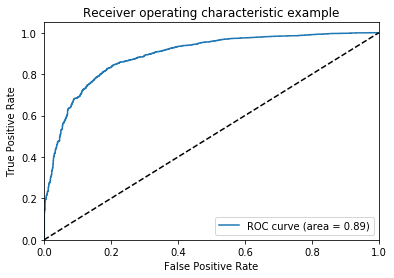

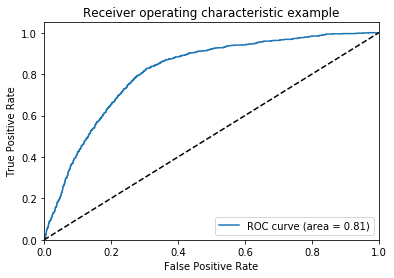

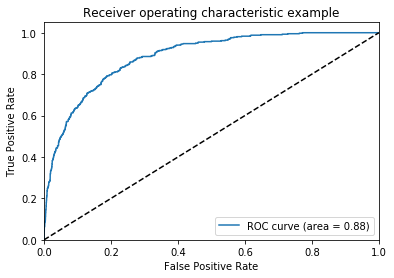

In [0]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Import some data to play with
y = data['Priceclass']
X = data.drop('Priceclass', 1)

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

y = label_binarize(y, classes=[0,1,2])
n_classes = 3

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.2, random_state=0)

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)#decision_function
y_score1 = clf.fit(X_train, y_train).predict(X_test)#
#y_scor = clf.predict(y_score)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    